In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
customer_df = pd.read_csv('tco-customers.csv')
churn_df = pd.read_csv('tco-churn.csv')

In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
customer_id                          7043 non-null object
count_x                              7043 non-null int64
gender                               7043 non-null object
age                                  7043 non-null int64
under_30                             7043 non-null object
senior_citizen                       7043 non-null object
married                              7043 non-null object
dependents                           7043 non-null object
number_of_dependents                 7043 non-null int64
count_y                              7043 non-null int64
quarter                              7043 non-null object
referred_a_friend                    7043 non-null object
number_of_referrals                  7043 non-null int64
tenure_in_months                     7043 non-null int64
offer                                7043 non-null object
phone_service                

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
Customer ID    7043 non-null object
Churn Label    7043 non-null object
dtypes: object(2)
memory usage: 110.2+ KB


In [5]:
churn_df.columns = churn_df.columns.str.lower().str.replace(' ', '_')

In [6]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
customer_id    7043 non-null object
churn_label    7043 non-null object
dtypes: object(2)
memory usage: 110.2+ KB


## Exploration of demographic and services data

In [7]:
numerical_cols = ["age", 
                    "number_of_referrals", 
                    "tenure_in_months",
                    "monthly_charge", 
                    "total_charges",
                ]

In [9]:
customers_num_data = customer_df[numerical_cols]

<Figure size 432x288 with 0 Axes>

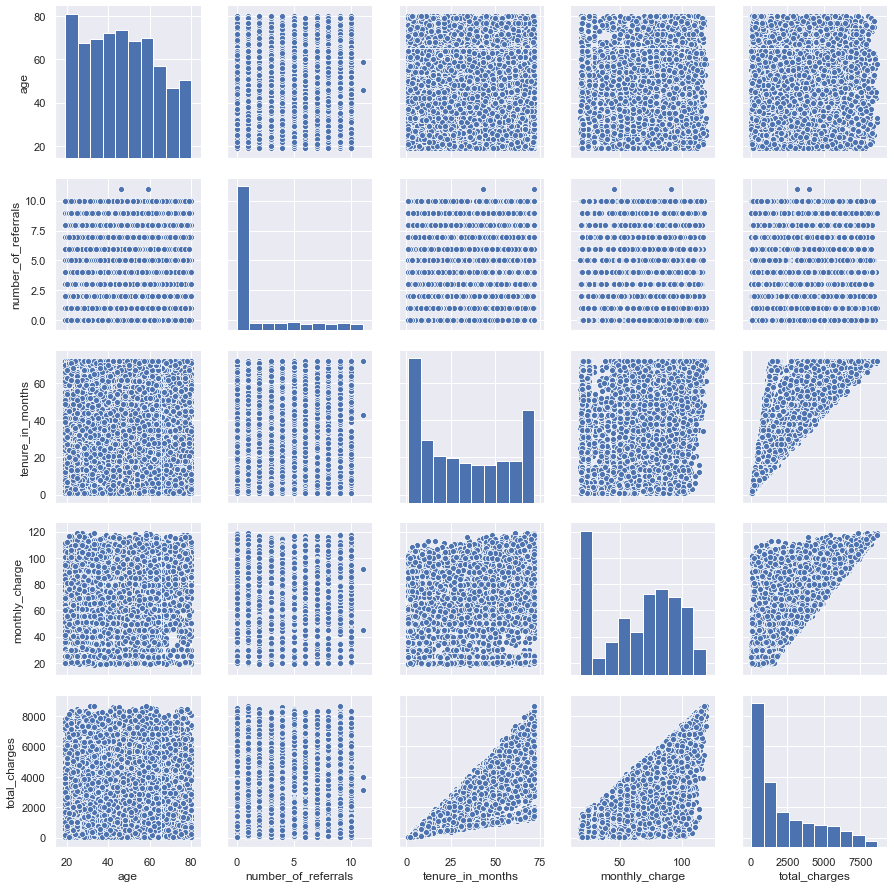

In [10]:
fig = plt.figure()
sns.pairplot(customers_num_data)

**Plot description:** This is a pairplot showing the relationships between the most important numerical columns. There are so many points in this dataset that it is difficult to make out patterns, but there is clearly a positive correlation between tenure and total charges. The relationship between monthly charge and total charges has an interesting shape, but I'm not sure if it would be considered a positive correlation. It looks like there is an upper limit on total charges that is related to monthly charges, but many total charges are less than this limit. 

Based on this plot, I suspect that "total_charges" refers to the total amount of money the customer has paid on this account over the lifetime of their having the account. This would explain the strong relationship between "total_charges" and "tenure_in_months" — the more months you have been with the company, the more you will have paid! 


In [54]:
categorical_cols = ["gender", 
                        "under_30", 
                        "senior_citizen", 
                        "married", 
                        "offer", 
                        "phone_service",
                        "internet_service",
                        "internet_type",
                        "unlimited_data",
                        "contract", 
                        "payment_method"]

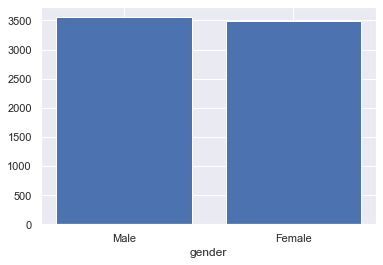

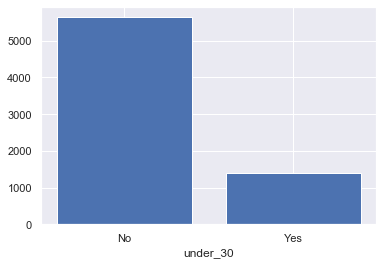

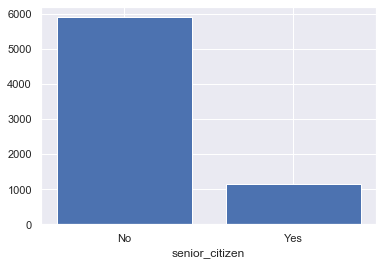

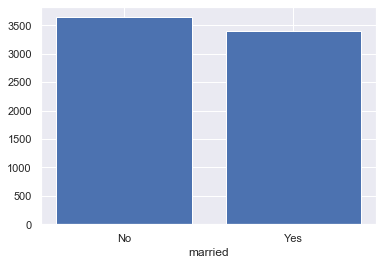

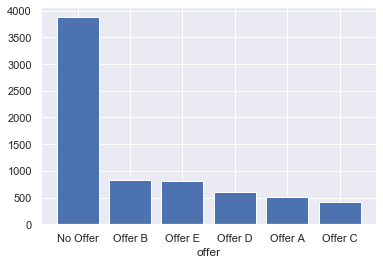

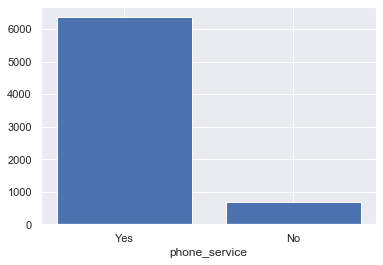

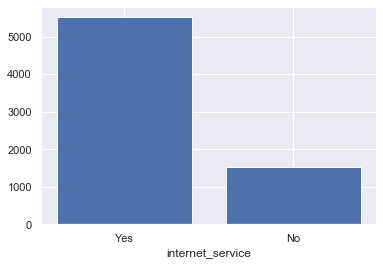

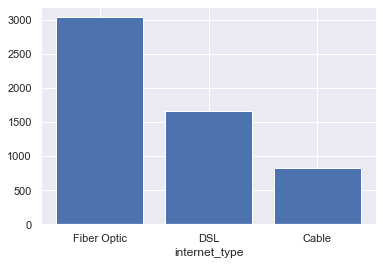

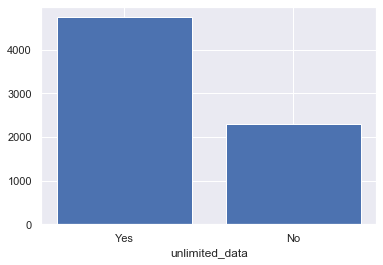

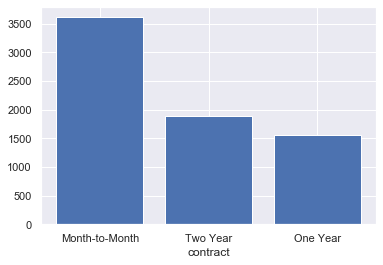

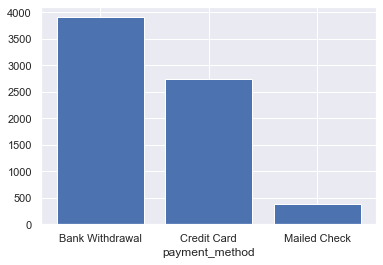

In [58]:
for col in categorical_cols:
    fig, ax = plt.subplots()
    s = customer_df[col].value_counts()
    ax.bar(s.index, s)
    ax.set_xlabel(col)

    

**Plot descriptions:** In the cell above, I create bar charts for each of the categorical variables to compare the size of the groups within each category. This has shown me the following:
* there are roughly the same number of male and female customers
* under 30s and senior citizens both represent a relatively low proportion of users
* customers are slightly more likely to be unmarried
* most customers did not use an offer
* all but about 7- or 800 customers do not have phone service
* about 1500 customers do not have internet service
* the most common type of internet is fiber optic
* about 2/3 of customers have unlimited data
* the most common type of contract is month-to-month
* the most common payment type is bank withdrawl

# Question 1:
Is there a relationship between the offer a customer used and their monthly charge? 

This is a categorical variable and a numerical variable. I will use a violin plot to visualize this relationship. 

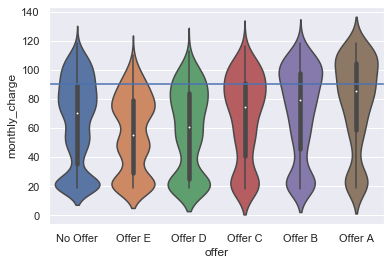

In [13]:
fig = plt.figure()
ax = sns.violinplot(data=customer_df, x="offer", y="monthly_charge")
ax.axhline(90)

This plot is very interesting. Specifically, it is interesting because the trends shows that some customers who used offers appear to be paying more than customers who did not use an offer at all. I added a line at y=90, the approximate location of Q3 on the "No Offer" plot, and found that Q3 is higher for offer B and significantly higher for offer A. 

One possibility is that these offers were for specialized services such as streaming or unlimited data, making them more expensive than the average plan, as difference not offset by the offer. It would be interesting to investigate whether the is a relationship between offer use and specialized services. 



## Question 2: 
Is there a relationship between a customer's contract status and their payment method?

These are two categorical variables. I will create a grouped bar chart to compare the breakdown for each intersection. 

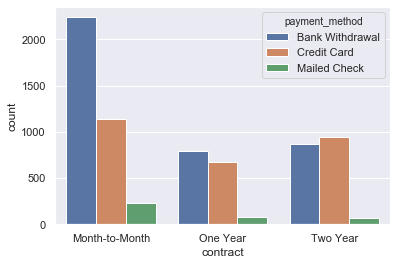

In [45]:
fig = plt.figure()
ax = sns.countplot(x="contract", hue="payment_method", data=customer_df)                                                                                
                                                                                

**Plot description:** This plot shows the breakdown of how customers pay based on the type of contract they have. Mailed checks are uncommon across all payment types. For one-year and two-year contract, bank withdrawal and credit card payment are about equally common, with bank withdrawl being slightly more popular for one-year contracts and credit card being slightly more popular for two-year contracts. Banks withdrawals are about twice as common for month-to-month customers than credit card payments are. 

It would be interesting to look into whether either of these factors, contract type or payment method, or a combination of the two, is related to churn. My hypothesis is that month-to-month customers are more likely to churn, since they not locked in to lengthy contracts.

## Question 3

Is there a relationship between a customer's age and the type of internet service a customer has? 

Age is a numerical column and internet_type is a categorical column. I will use boxplots to compare the distribution age across the different types of internet service. 

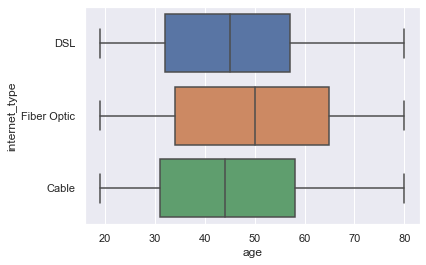

In [46]:
fig = plt.figure()
ax = sns.boxplot(x="age", y="internet_type", data=customer_df)

**Plot Description:** This plot shows that every type of internet service has customers ranging in age from ~19 to 80. The distributions for DSL and cable internet appear to have similar distributions, while fiber optic seems to skew a little older. Half of all fiber optic customers are over 50. This seems surprising; I would have guessed that fiber optic service would skew younger. 

## Joining the DataFrames 

In [37]:
churn_df["customer_id"].head()

0    8779-QRDMV
1    7495-OOKFY
2    1658-BYGOY
3    4598-XLKNJ
4    4846-WHAFZ
Name: customer_id, dtype: object

In [38]:
customer_df["customer_id"].head()

0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: customer_id, dtype: object

In [39]:
churn_df["customer_id"] = churn_df["customer_id"].str.replace('-', '')

In [40]:
churn_df["customer_id"].head()

0    8779QRDMV
1    7495OOKFY
2    1658BYGOY
3    4598XLKNJ
4    4846WHAFZ
Name: customer_id, dtype: object

In [41]:
joined_df = customer_df.merge(churn_df)

In [42]:
joined_df.head()

,customer_id,count_x,gender,age,under_30,senior_citizen,married,dependents,number_of_dependents,count_y,...,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,churn_label
0,8779QRDMV,1,Male,78,No,Yes,No,No,0,1,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,Yes
1,7495OOKFY,1,Female,74,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,Yes
2,1658BYGOY,1,Male,71,No,Yes,No,Yes,3,1,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,Yes
3,4598XLKNJ,1,Female,78,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,Yes
4,4846WHAFZ,1,Female,80,No,Yes,Yes,Yes,1,1,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,Yes


# Adding in churn

## **Do younger customers churn at a higher rate?** 

Hypothesis: younger customers are always looking for new technology and better deals, while older customers might be less inclined to switch companies from what they are familiar with.

Columns: 
* under_30 (categorical, two values)
* age (numerical, range of integers)
* churn_label (categorical, two values)

The two categorical variables can be visualized using grouped bar charts (countplot). 
There are many different options for comparing age distributions among churned and non-churned users. A boxplot seems like a good place to start. 

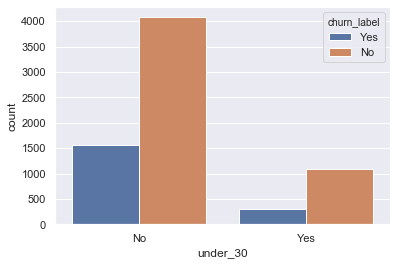

In [51]:
fig = plt.figure()
ax = sns.countplot(x="under_30", hue="churn_label", data=joined_df)

**Plot description:** This plot divides customers into those who are under 30 years old and those who are 30 and older. It then divides each of these groups into whether or not they churned. Since the group of people under 30 is so much smaller than the groups of 30 and over, it's hard to tell which group has a worse churn rate. I did some quick math, though, and it looks like about 300 of the under-30 users churned out of a total of about 1400 (300 yes + 1100 no). This is about 21.4%. For users 30 and over, this looks like about 1500 out of 5600 (1500 yes + 4100 no), or about 26.7%. This seems to suggest that younger users are less likely to churn that other users, but these values are close enough together that it would probably be better to use the data to calculate the values directly. 

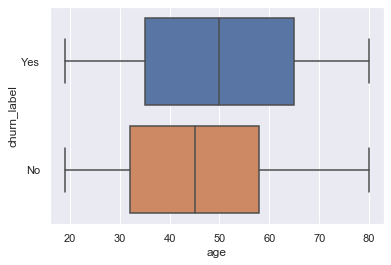

In [53]:
fig = plt.figure()
ax = sns.boxplot(x="age", y="churn_label", data=joined_df)

**Plot description:** A pair of boxplots showing the distrbution of ages for customers who churned (blue) and customers who did not churn (orange). While the range for both boxplots is the same (~19 to 80) Q1, the median, and Q3 of the blue plot are all greater than the corresponding benchmarks on the orange plot. That means the age distribution of people who did not churn skews younger than the age distribution of people who did churn, further supporting the possibility that older customers tend to churn more than younger customers.   

## **Do customers with an unlimited data plan churn at a lower rate?**

Hypothesis: customers who do not have unlimited data may become frustrated will low data speeds and seek out a different company. 

Columns:
* churn (categorical, two values)
* unlimited_data (categorical, two values)

Once again, the most appropriate plot type is a countplot. 


Yes    4745
No     2298
Name: unlimited_data, dtype: int64


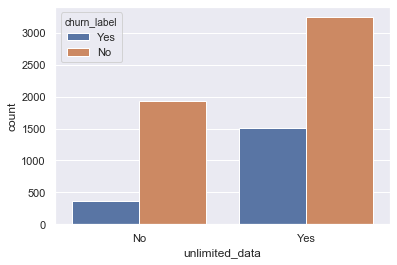

In [63]:
print(joined_df["unlimited_data"].value_counts())

fig = plt.figure()
ax = sns.countplot(x="unlimited_data", hue="churn_label", data=joined_df)

**Plot descripton:** Contrary to my hypothesis, it looks like customers without unlimited data actually churn at a much lower rate than those with unlimited data. It looks like about 350-400 of the 2298 customers without unlimited data churned -- that's about 15-17% of customers. In contrast, about 1500 of the 4745 customers who do have unlimited data churned -- more than 30%!

## **Do customers with a longer customer tenure churn at a lower rate?**

Hypothesis: the longer a customer has been with the company, the less likely they are to leave. 

Columns:
* tenure_in_months, numeric
* churn_label, categorical

I will use overlapping histograms to explore this hypothesis. 

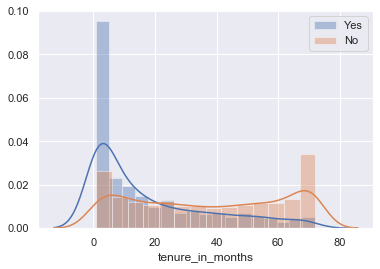

In [62]:
churned_yes_df = joined_df.loc[joined_df["churn_label"] == "Yes"]
churned_no_df = joined_df.loc[joined_df["churn_label"] == "No"]


fig = plt.figure()
sns.distplot(churned_yes_df["tenure_in_months"], label="Yes")
sns.distplot(churned_no_df["tenure_in_months"], label="No")
plt.legend()

**Plot description:** These distributions are very interesting. There's a huge peak just past the zero-month mark for customers who churned, and a much smaller peak around 70 monts for customers who did not churn. This plot supports the hypothesis that customers with longer tenure and less likely to churn. It's interesting just how many of the churned customers are in the group that has barely any customer tenure. Is it possible these people never even started their contract? Are they all month-to-month customers? 

The high-end peak for non-churners is also interesting. Why have so many customer been with the company for 70-ish months, and no one has been with the company longer? It's possible the company is only ~6 years (72 months) old. It's also possible that there is a cap on the "tenure_in_months" column for some reason, so any customers who have been with the company longer get grouped into the maximum number of months. 

To continue my analysis, I decided to look at contract type versus churn, to find out whether it's mostly month-to-month customers who are churning. 


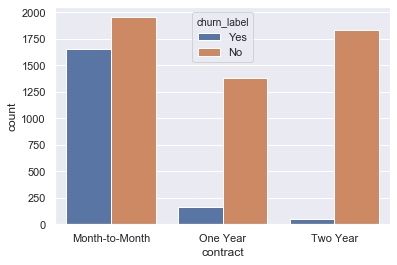

In [73]:
fig = plt.figure()
ax = sns.countplot(x="contract", hue="churn_label", data=joined_df)

**Plot description:** This plot supports my hypothesis that customers on a month-to-month contract are most likely to churn. No, I'm curious what the distribution of monthly charges are for each of the different contract types. I will use a split violinplot to visualize this. 

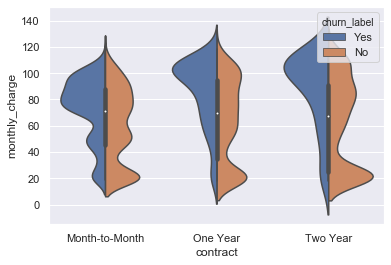

In [75]:
fig = plt.figure()
ax = sns.violinplot(x="contract", y="monthly_charge", hue="churn_label", split=True, data=joined_df)

**Plot description:** This plot shows that customers with low monthly charges are much more likely to not churn, and customers with higher monthly charger are much more likely to churn. This makes sense — people with a low bill will be less likely to conclude that they are paying too much and leave the company. Of course, customers with a low monthly charge aren't going to make the company much money, either! We need to figure out how to retain more of the high-paying customers. 
